In [12]:
from random import randint
import time
import numpy as np
import mdptoolbox

#***********************************20*****************************************************************************************
N = 50# Max number of transformers in the system, since we cant assume that the system can have an infinite number of them
T = 60 # No of time periods with each being a quarter- 400 corresponds to a 100 year, where we assume the mean age of
#system cannot exceed this quantity.
SIM =100 # No of simulations for the experiment 
age_cheap = -2 # This is also the minumum age possble of any transformer in the system


###############################################################################################################################
# Create a random sample of G transformers' ages each having a random age between age_min and and agemax such that its
# mean age is 'a'
def sample(a, G):
    totage = a*G
    genAge= np.empty(G)
    for i in range(G-1):
        sample = np.random.randint(age_cheap, max(age_cheap,min(T, totage))+1)
        genAge[i]= sample
        totage = totage- sample
    genAge[G-1] =(a*G -sum(genAge[:G-1]))
    return genAge
#*****************************************************************************************************************************
#calculates the mean age of the state once '1 to W' transformers are randomly removed from the system for "SIM" no of scenarios
# Also computes the number of useful transformers (age>=0) in each simulation run (of creating SIM random samples)
def simTPM(SIM,a,W):
    A =(age_cheap-1)*np.ones((SIM, W)) 
    CMAT= np.zeros(( N+1))
    for j in range(SIM):
        test =sample(a,W)
        x = (test >=0).sum() 
        CMAT[x]+=1
        s= np.sort(test)
        start =(np.sum(np.array(s) < 0, axis=0))
        oldarr = s[:start]
        newarr = s[start:]
        if len(newarr)==0:
            continue
        for k in range(1,len(newarr)+1):
            if len(newarr)> k-1:
                all_but_one = np.random.choice(newarr, len(newarr)-k , replace=False)
                final =np.concatenate((all_but_one,oldarr), axis=0)
                if len(final)>0:
                    A[j][k-1]= round(np.sum(final)/len(final)+1)
                else:
                    A[j][k-1]=0
    
    A = np.flip(A, 1)
    
    return A, CMAT
# *****************************************************************************************************************************
# Create TPM Block structure using Simulation to be used in forming the actual TPM for the MDP
def calcTPM(A):
    data = A
    newdata = data[data>age_cheap-1]
    unique, counts = np.unique(newdata, return_counts=True)
    datab = dict(zip(unique, counts))
    v= sum([datab[i] for i in datab if i > T])
   
    if T not in datab:
        datab.update([(T,v)])
    else:
        datab[T]+= v
    
    datab= dict((k, v) for k, v in datab.items() if k<= T)

    
    B = np.zeros(T- age_cheap +1)
    if sum(datab.values())==0:
        return B
    for key in datab.keys():
        for n in range(age_cheap, T+1):
            if n == key:
                B[n-age_cheap] = datab[key]/sum(datab.values())
    
    return (B)            
#***************************************************MAIN***********************************************************************
TPMSIM = np.zeros((len(list(range((N-1)*(T-age_cheap +1)))),len(list(range(N*(T-age_cheap +1))))))
COSTSIM = np.zeros(((N-1)*(T-age_cheap+1), N+1))
    
for i in range(2, N+1):
    for j in range(0,T- age_cheap +1 ):
        A, CMAT = simTPM(SIM, j+age_cheap, i)
        COSTSIM[(i-2)*(T-age_cheap +1)+j] = CMAT
        l=[]
        for n in range(1,i):
            B = calcTPM(A[:,n])
            l = np.hstack((l,B))
        for x in range(len(l)):
            TPMSIM[(i-2)*(T-age_cheap +1)+j][x]= l[x]
        
        #print([j-6,i, COSTSIM[(i-2)*(T-age_cheap +1)+j],TPMSIM[(i-2)*(T-age_cheap +1)+j] ])
        print([j+age_cheap,i])
#**************WRITING OUTPUT ARRAYS AND INPUT PARAMETERS TO FILE ***********************************************************
with open('COSTSIM.txt','wb') as f:
    for line in COSTSIM:
        np.savetxt(f, line, fmt='%.2f')
with open('TPMSIM.txt','wb') as g:
    for line in TPMSIM:
        np.savetxt(g, line, fmt='%.2f')
with open('params.txt','w') as h:
    h.write(str(N)+"  "+ str(T)+"  "+ str(age_cheap))

[-2, 2]
[-1, 2]
[0, 2]
[1, 2]
[2, 2]
[3, 2]
[4, 2]
[5, 2]
[6, 2]
[7, 2]
[8, 2]
[9, 2]
[10, 2]
[11, 2]
[12, 2]
[13, 2]
[14, 2]
[15, 2]
[16, 2]
[17, 2]
[18, 2]
[19, 2]
[20, 2]
[21, 2]
[22, 2]
[23, 2]
[24, 2]
[25, 2]
[26, 2]
[27, 2]
[28, 2]
[29, 2]
[30, 2]
[31, 2]
[32, 2]
[33, 2]
[34, 2]
[35, 2]
[36, 2]
[37, 2]
[38, 2]
[39, 2]
[40, 2]
[41, 2]
[42, 2]
[43, 2]
[44, 2]
[45, 2]
[46, 2]
[47, 2]
[48, 2]
[49, 2]
[50, 2]
[51, 2]
[52, 2]
[53, 2]
[54, 2]
[55, 2]
[56, 2]
[57, 2]
[58, 2]
[59, 2]
[60, 2]
[-2, 3]
[-1, 3]
[0, 3]
[1, 3]
[2, 3]
[3, 3]
[4, 3]
[5, 3]
[6, 3]
[7, 3]
[8, 3]
[9, 3]
[10, 3]
[11, 3]
[12, 3]
[13, 3]
[14, 3]
[15, 3]
[16, 3]
[17, 3]
[18, 3]
[19, 3]
[20, 3]
[21, 3]
[22, 3]
[23, 3]
[24, 3]
[25, 3]
[26, 3]
[27, 3]
[28, 3]
[29, 3]
[30, 3]
[31, 3]
[32, 3]
[33, 3]
[34, 3]
[35, 3]
[36, 3]
[37, 3]
[38, 3]
[39, 3]
[40, 3]
[41, 3]
[42, 3]
[43, 3]
[44, 3]
[45, 3]
[46, 3]
[47, 3]
[48, 3]
[49, 3]
[50, 3]
[51, 3]
[52, 3]
[53, 3]
[54, 3]
[55, 3]
[56, 3]
[57, 3]
[58, 3]
[59, 3]
[60, 3]
[-2, 4]
[-1,

[39, 17]
[40, 17]
[41, 17]
[42, 17]
[43, 17]
[44, 17]
[45, 17]
[46, 17]
[47, 17]
[48, 17]
[49, 17]
[50, 17]
[51, 17]
[52, 17]
[53, 17]
[54, 17]
[55, 17]
[56, 17]
[57, 17]
[58, 17]
[59, 17]
[60, 17]
[-2, 18]
[-1, 18]
[0, 18]
[1, 18]
[2, 18]
[3, 18]
[4, 18]
[5, 18]
[6, 18]
[7, 18]
[8, 18]
[9, 18]
[10, 18]
[11, 18]
[12, 18]
[13, 18]
[14, 18]
[15, 18]
[16, 18]
[17, 18]
[18, 18]
[19, 18]
[20, 18]
[21, 18]
[22, 18]
[23, 18]
[24, 18]
[25, 18]
[26, 18]
[27, 18]
[28, 18]
[29, 18]
[30, 18]
[31, 18]
[32, 18]
[33, 18]
[34, 18]
[35, 18]
[36, 18]
[37, 18]
[38, 18]
[39, 18]
[40, 18]
[41, 18]
[42, 18]
[43, 18]
[44, 18]
[45, 18]
[46, 18]
[47, 18]
[48, 18]
[49, 18]
[50, 18]
[51, 18]
[52, 18]
[53, 18]
[54, 18]
[55, 18]
[56, 18]
[57, 18]
[58, 18]
[59, 18]
[60, 18]
[-2, 19]
[-1, 19]
[0, 19]
[1, 19]
[2, 19]
[3, 19]
[4, 19]
[5, 19]
[6, 19]
[7, 19]
[8, 19]
[9, 19]
[10, 19]
[11, 19]
[12, 19]
[13, 19]
[14, 19]
[15, 19]
[16, 19]
[17, 19]
[18, 19]
[19, 19]
[20, 19]
[21, 19]
[22, 19]
[23, 19]
[24, 19]
[25, 19]
[26

[21, 32]
[22, 32]
[23, 32]
[24, 32]
[25, 32]
[26, 32]
[27, 32]
[28, 32]
[29, 32]
[30, 32]
[31, 32]
[32, 32]
[33, 32]
[34, 32]
[35, 32]
[36, 32]
[37, 32]
[38, 32]
[39, 32]
[40, 32]
[41, 32]
[42, 32]
[43, 32]
[44, 32]
[45, 32]
[46, 32]
[47, 32]
[48, 32]
[49, 32]
[50, 32]
[51, 32]
[52, 32]
[53, 32]
[54, 32]
[55, 32]
[56, 32]
[57, 32]
[58, 32]
[59, 32]
[60, 32]
[-2, 33]
[-1, 33]
[0, 33]
[1, 33]
[2, 33]
[3, 33]
[4, 33]
[5, 33]
[6, 33]
[7, 33]
[8, 33]
[9, 33]
[10, 33]
[11, 33]
[12, 33]
[13, 33]
[14, 33]
[15, 33]
[16, 33]
[17, 33]
[18, 33]
[19, 33]
[20, 33]
[21, 33]
[22, 33]
[23, 33]
[24, 33]
[25, 33]
[26, 33]
[27, 33]
[28, 33]
[29, 33]
[30, 33]
[31, 33]
[32, 33]
[33, 33]
[34, 33]
[35, 33]
[36, 33]
[37, 33]
[38, 33]
[39, 33]
[40, 33]
[41, 33]
[42, 33]
[43, 33]
[44, 33]
[45, 33]
[46, 33]
[47, 33]
[48, 33]
[49, 33]
[50, 33]
[51, 33]
[52, 33]
[53, 33]
[54, 33]
[55, 33]
[56, 33]
[57, 33]
[58, 33]
[59, 33]
[60, 33]
[-2, 34]
[-1, 34]
[0, 34]
[1, 34]
[2, 34]
[3, 34]
[4, 34]
[5, 34]
[6, 34]
[7, 34]
[

[3, 47]
[4, 47]
[5, 47]
[6, 47]
[7, 47]
[8, 47]
[9, 47]
[10, 47]
[11, 47]
[12, 47]
[13, 47]
[14, 47]
[15, 47]
[16, 47]
[17, 47]
[18, 47]
[19, 47]
[20, 47]
[21, 47]
[22, 47]
[23, 47]
[24, 47]
[25, 47]
[26, 47]
[27, 47]
[28, 47]
[29, 47]
[30, 47]
[31, 47]
[32, 47]
[33, 47]
[34, 47]
[35, 47]
[36, 47]
[37, 47]
[38, 47]
[39, 47]
[40, 47]
[41, 47]
[42, 47]
[43, 47]
[44, 47]
[45, 47]
[46, 47]
[47, 47]
[48, 47]
[49, 47]
[50, 47]
[51, 47]
[52, 47]
[53, 47]
[54, 47]
[55, 47]
[56, 47]
[57, 47]
[58, 47]
[59, 47]
[60, 47]
[-2, 48]
[-1, 48]
[0, 48]
[1, 48]
[2, 48]
[3, 48]
[4, 48]
[5, 48]
[6, 48]
[7, 48]
[8, 48]
[9, 48]
[10, 48]
[11, 48]
[12, 48]
[13, 48]
[14, 48]
[15, 48]
[16, 48]
[17, 48]
[18, 48]
[19, 48]
[20, 48]
[21, 48]
[22, 48]
[23, 48]
[24, 48]
[25, 48]
[26, 48]
[27, 48]
[28, 48]
[29, 48]
[30, 48]
[31, 48]
[32, 48]
[33, 48]
[34, 48]
[35, 48]
[36, 48]
[37, 48]
[38, 48]
[39, 48]
[40, 48]
[41, 48]
[42, 48]
[43, 48]
[44, 48]
[45, 48]
[46, 48]
[47, 48]
[48, 48]
[49, 48]
[50, 48]
[51, 48]
[52, 48]


In [11]:
import math
from random import randint
import time
import numpy as np
import mdptoolbox

#Reading Output from Simulation run program which will go in as an input for the MDP for the Transformer replacement policy
with open('params.txt','r')as f:
    data = f.readline()
    data =data.rstrip("\n")
    myparams = str(data).split("  ")
j=[]
for p in myparams:
    j.append(int(p))
# Carrying over parameters from SIMULATION RUN for consistency
[N,T,age_cheap] = j # N = max transformers in the system, T = horizon we are considering for the MDP, age_cheap is the
# minimum age of a transformer in the system It is also the lead time of the transformer bought at normal cost. Each unit in
#this problem is a quarter. 
COSTSIM = np.loadtxt('COSTSIM.txt')
TPMSIM = np.loadtxt('TPMSIM.txt')
COSTSIM= np.reshape(COSTSIM,((N-1)*(T-age_cheap+1), N+1)) 
TPMSIM = np.reshape(TPMSIM,((N-1)*(T-age_cheap +1),(N)*(T-age_cheap +1)))
COST_set =[(age_cheap,2)]
k=2
for a in range(1,(N-1)*(T-age_cheap+1)):
    if a%(T-age_cheap+1)==0:
        k=k+1
    COST_set.append(( a%(T-age_cheap+1) +age_cheap,k))
#print(COST_set)
#print(len(COST_set))
# Other PARAMETERS for MDP**********************************************************************************************************
age_expensive =0 # lead time for transformer bought on expedite mode
p_max = 4 # Max number of cheap transformers that can be bought in a period
q_max = 4 # max number of expensive transformers that can be bought in period
cost_0 = 500000 # cost of buying a transformer for regular installation
cost_1 = 600000 # cost of buyng a transformer for an expedited instalation
N_t = 3 #Target number of transformers in the system
mu= 0.05 #Constant faliure rate of transformer in any time period. Eg 0.01 corresponds to a mean life of 100 time periods 
c_0 = 100000 # constant overhead for congestion cost calculation
alpha = 1.5 # parameter to capture congestion costs
Cost = [-10000000] # if zero transformers are in system theoretically the cost is - infinity hence we use a large neg number
#*****************************************************************************************************************************
# This N+1 array gives the cost when the system has n working tranformers (0<=n <=N) at any given epoch.
for i in range(1,N+1):
    Cost.append(-c_0*np.power(N_t/i, alpha))
print(Cost)
################################################################################################################################
A = list(range((p_max+1)*(1+q_max))) # ACTIONS
S = list(range((N)*(T-age_cheap +1)+1)) #STATES
#Mapping action space to a tuple of decisions where each element is no of cheap and expensive transformers bought
A_set=[]
for p in range(p_max+1):
    for q in range(q_max+1):
        A_set.append((p,q))
#print(A_set)
# Mapping state space to the tuple of  state variables - mean Age and no of transformers in the system 
S_set =[(0,0)]
for p in range(1,N+1):
    for q in range(age_cheap, T+1):
        S_set.append((q,p))
#print(S_set[3][0])
#print(N)
#print(T)
#print(len(S))
#print(len(S_set))
#******************************************************************************************************************************
#Calculating Reward Matrix to be provided for the MDP--------------------------------------------------------------------------
Reward = np.zeros((len(A),len(S),len(S)))
for  a,action in enumerate(A_set):
    startA = time.process_time()
    for sf, state_from in enumerate(S_set):
        startB = time.process_time()
        for st, state_to in enumerate(S_set):
            if(state_from[1] ==0):
                Reward[a][sf][st]= -action[0]*cost_0- action[1]*cost_1 +Cost[state_from[1]]
            elif (state_from[1] ==1 and state_from[0] <0):
                Reward[a][sf][st]= -action[0]*cost_0- action[1]*cost_1 +Cost[state_from[1]-1]
            elif (state_from[1] ==1):
                Reward[a][sf][st]= -action[0]*cost_0- action[1]*cost_1 +Cost[state_from[1]]
            
            else:
                Reward[a][sf][st]= -action[0]*cost_0- action[1]*cost_1 +np.dot(COSTSIM[COST_set.index(state_from)],\
                                    Cost)/sum(COSTSIM[COST_set.index(state_from)])
        #print( str(time.process_time()- startB) + "Innerloop")
    print( str(time.process_time()- startA) + "outerloop")
print("REWARD _OK")    
#for  a,action in enumerate(A_set):
    #for sf, state_from in enumerate(S_set):
        
            #print(action,state_from, Reward[a][sf][0])
###############################################################################################################################
#Calculating TPMatrix for no purchase ( baseline action) -to be provided for the MDP--------------------------------------------------------------------------
Prob = np.zeros_like(TPMSIM)
p_f = 1- math.exp(-mu)
redS_set = S_set[1:]
for i , ival in enumerate(COST_set):
    for j, jval in enumerate(redS_set):
        if ival[1]-jval[1]>0:
            Prob[i][j] = np.power(p_f, ival[1]-jval[1] )
TPMblock = np.multiply(Prob, TPMSIM)

TPM = np.zeros((len(A),len(S),len(S)))
TPM[0][(2+T-age_cheap):,1:]= TPMblock
TPM[0][0][0] =1
for i, ival in enumerate(S_set):
    if (ival[1]>1 or ival[0]>0):
        TPM[0][i][0]= np.power(p_f, ival[1])
for i, ival in enumerate(S_set):
    if i ==0 or ival[0]==T:
        continue
    for j, jval in enumerate(S_set):
        if (jval[0] == ival[0]+1 and jval[1] == ival[1]):
            TPM[0][i][j] = 1- sum([ TPM[0][i][l] for l in range(0,i+1)])
for i, ival in enumerate(S_set):
    if ival[0]==T:
        TPM[0][i][i] += 1-sum([ np.power(p_f, x) for x in range(1,ival[1]+1)])
temp = TPM[0]

for p in range(p_max+1):
    for q in range(q_max+1):
        if(p==0 and q==0):
            TPM[p*q_max+q]= temp
            continue
        for i, ival in enumerate(S_set):
        
            for j, jval in enumerate (S_set):
                meanage =age_cheap-1
                transformers =N+1
                
                if temp[i][j] !=0:
                    meanage = (S_set[j][0]*S_set[j][1] +(age_cheap+1)*p + (age_expensive+1)*q)/(p+q+S_set[j][1])
                    transformers = int(np.minimum(p+q+S_set[j][1], N))
                    if meanage< age_cheap:
                        meanage = age_cheap
                    elif meanage >= T:
                        meanage =T
                    else:
                        meanage = int(np.round(meanage))
                    TPM[p*(q_max+1)+q][i][S_set.index((meanage,transformers))]+= temp[i][j]

for k in range((p_max+1)*(q_max+1)):
    for l, laval in enumerate(S_set):
        error = sum(TPM[k][l])-1
        if(abs(error)<0.001):
            pos = np.argmax(TPM[k][l])
            TPM[k][l][pos]+=abs(error)
        
for k in range((p_max+1)*(q_max+1)):
    for l, laval in enumerate(S_set):
        if abs(sum(TPM[k][l])-1)>0:
            print(k,l,sum(TPM[k][l]))
print("TPM OK")            
beta =0.999999
grid = mdptoolbox.mdp.PolicyIteration(TPM, Reward, beta)
grid.run()
#print(grid.V)
#print(grid.policy)
outputpolicy={}
policy = "OUTPUTPOLICY.txt"
outputpolicy={}
for idx, a in enumerate(grid.policy):
    outputpolicy[S_set[idx]]= A_set[a]
f= open(policy, "w")

for k, v in outputpolicy.items():
    f.write(str(k) + ' >>> '+ str(v) + '\n\n')

f.close()

[-10000000, -519615.2422706632, -183711.73070873835, -100000.0, -64951.9052838329, -46475.800154489, -35355.33905932738, -28056.58588748473]
0.109375outerloop
0.09375outerloop
0.09375outerloop
0.109375outerloop
0.109375outerloop
0.09375outerloop
0.109375outerloop
0.109375outerloop
0.09375outerloop
0.109375outerloop
0.09375outerloop
0.09375outerloop
0.109375outerloop
0.09375outerloop
0.09375outerloop
0.109375outerloop
0.109375outerloop
0.09375outerloop
0.09375outerloop
0.109375outerloop
0.109375outerloop
0.09375outerloop
0.109375outerloop
0.109375outerloop
0.109375outerloop
REWARD _OK
4 59 1.0000000000000004
10 107 1.0000000000000004
10 109 1.0000000000000004
12 106 1.0000000000000002
13 59 1.0000000000000004
14 76 1.0000000000000004
17 76 1.0000000000000004
20 54 1.0000000000000004
20 76 1.0000000000000004
24 76 1.0000000000000004
TPM OK


In [ ]:
s = [4,3,2,2,3,4,7]
start =(np.sum(np.array(s) < 0, axis=0))
oldarr = s[:start]
newarr = s[start:]
print(oldarr)
print(np.mean(oldarr))

In [ ]:
dict1 = {2:5, 6:2}
x = 4
print(sum([dict1[i] for i in dict1 if dict1[i] >= x]))

In [ ]:
a=0
N =3
totage = a*N
genAge= np.empty(N)
lbound = -6
ubound = 400
for i in range(N-1):
    sample = np.random.randint(lbound, max(lbound,min(ubound, totage))+1)
    genAge[i]= sample
    totage = totage- sample
genAge[N-1] =(a*N -sum(genAge[:N-1]))
print(genAge)
print(sum(genAge[:N-1])/len(genAge[:N-1]))

In [ ]:
print(len([i for i in np.random.randint(-6,401, size=1000) if i ==400]))

In [ ]:
def sample(a, N):
    totage = a*N
    genAge= np.empty(N)
    lbound = -6
    ubound = 400
    for i in range(N-1):
        sample = np.random.randint(lbound, max(lbound,min(ubound, totage))+1)
        genAge[i]= sample
        totage = totage- sample
    genAge[N-1] =(a*N -sum(genAge[:N-1]))
    return genAge


SIM=100
N =8
A =-7*np.ones((SIM, N)) 
B = np.zeros((SIM,N))
for j in range(SIM):
    test =sample(200,N)
    B[j,:]= test
    s= np.sort(test)
    start =(np.sum(np.array(s) < 0, axis=0))
    oldarr = s[:start]
    newarr = s[start:]
    if len(newarr)==0:
        continue
    for k in range(1,len(newarr)+1):
        if len(newarr)> k-1:
            all_but_one = np.random.choice(newarr, len(newarr)-k , replace=False)
            final =np.concatenate((all_but_one,oldarr), axis=0)
            if len(final)>0:
                A[j][k-1]= round(np.sum(final)/len(final)+1)
            else:
                A[j][k-1]=0
                
for j in range(SIM):
        for k in range(N):
             A[j][k]= max(lbound-1, A[j][k])    
for j in range(SIM):
   
        print(B[j,:], A[j,:])
        print("o")





In [ ]:
from random import randint
import time
import matplotlib.pyplot as plt
import numpy as np
N=5
Z= (np.zeros(N+1))
genAge= np.empty(N)
for i in range(N):
        sample = np.random.randint(-2, N)
        genAge[i]= sample
print(genAge)    
x = (genAge >=0).sum()  
Z[x]+-1
print(Z)


In [ ]:
import numpy as np
COSTSIM = np.zeros((3,11))
CMAT = np.ones(11)
COSTSIM[0]=  CMAT
print(COSTSIM)

In [ ]:
def sample(a, G):
    totage = a*G
    genAge= np.empty(G)
    for i in range(G-1):
        sample = np.random.randint(age_cheap, max(age_cheap,min(T, totage))+1)
        genAge[i]= sample
        totage = totage- sample
    genAge[G-1] =(a*G -sum(genAge[:G-1]))
    return genAge

N=10
T=500
Z =np.zeros(N+1)
for i in range(100):
    y = sample(85,N)
    x = (y >=0).sum()
    Z[x]+=1
    print(y)
print(Z)   

In [ ]:
import numpy as np
n=7
t =9
age=4
fr=90

a = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
mat = np.matrix(a)
with open('outfile.txt','wb') as f:
    for line in mat:
        np.savetxt(f, line, fmt='%.2f')
with open('params.txt','w') as f:
    f.write(str(n)+"  "+ str(t)+"  "+ str(age)+"  "+ str(fr))
    
   

In [ ]:
b = np.loadtxt('COSTSIM.txt')
c=np.reshape(b,(36,5))
print(c[3][4])

In [ ]:
cc = np.array([[2,3,4,5,6,7,8,],[5,6,7,5,6,7,8,],[8,9,2,2,2,2,1],[2,3,4,5,6,7,8,],[5,6,7,5,6,7,8,],[8,9,2,2,2,2,1]])
dd = np.array([[7,2,],[9,8]])
print(cc)
kk=cc[:,0]

print(kk)

In [ ]:
for x in range(1,1):
    print(np.power(3,x))

In [12]:
N_t =13
alpha =1.5
c_0 = 100000
Cost =[]
for i in range(1,26):
    Cost.append(-c_0*np.power(N_t/i, alpha))
print(Cost)

[-4687216.658103187, -1657181.341917655, -902055.2664353241, -585902.0822628983, -419237.40291152464, -318924.6979507278, -253085.910580006, -207147.66773970687, -173600.61696678467, -148222.80526288794, -128477.18153745304, -112756.90830441551, -100000.0, -89479.38179694721, -80682.27580844278, -73237.76028286229, -66871.58952080988, -61377.08673769092, -56595.85523310866, -52404.67536394058, -48706.406200489335, -45423.54314643407, -42493.57543578026, -39865.58724384097, -37497.73326482549]


27.0


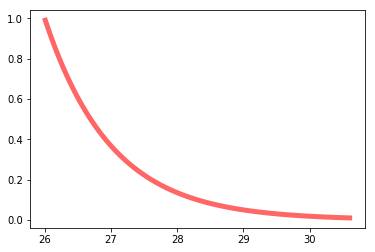

In [26]:
from scipy.stats import expon
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 1)
c = 26
mean, var, skew, kurt = expon.stats(c, moments='mvsk')
x = np.linspace(expon.ppf(0.01, c),expon.ppf(0.99, c), 100)
ax.plot(x, expon.pdf(x, c),'r-', lw=5, alpha=0.6, label='triang pdf')
print(mean)

In [6]:
policy = "OUTPUTPOLICY.txt"
outputpolicy={}
for a in range(100):
    outputpolicy[a]= a+93
fo= open(policy, "w")

for k, v in outputpolicy.items():
    fo.write(str(k) + ' >>> '+ str(v) + '\n\n')

fo.close()
